# Sentiment Analysis IMDB

In [3]:
import pandas as pd
import numpy as np

In [4]:
imdb_data = pd.read_csv('IMDB.csv')

imdb_data.head()
imdb_data.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Preprocessing

In [6]:
# Processing and cleaning the data
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()

processing_review = []
single_review = ""

for review in imdb_data.review:
    single_review = review

    # Remove HTML tags
    single_review = re.sub('<.*?>', '', single_review)

    # Remove single letter
    single_review = re.sub('\s+[a-zA-z]\s+', ' ', single_review)

    # Remove multiple spaces
    single_review = re.sub('\s+', ' ', single_review)

    # remove stopwords
    single_review = ' '.join([word for word in single_review.split() if word.lower() not in stop_words])

    # tokenize the words
    words_tokens = word_tokenize(single_review)

    filtered_sentence = []

    filtered_sentence = " ".join([lemmatizer.lemmatize(word) for word in words_tokens])

    processing_review.append(filtered_sentence)



print(processing_review[0])





One reviewer mentioned watching 1 Oz episode hooked . right , exactly happened me.The first thing struck Oz brutality unflinching scene violence , set right word GO . Trust me , show faint hearted timid . show pull punch regard drug , sex violence . hardcore , classic use word.It called OZ nickname given Oswald Maximum Security State Penitentary . focus mainly Emerald City , experimental section prison cell glass front face inwards , privacy high agenda . Em City home many .. Aryans , Muslims , gangsta , Latinos , Christians , Italians , Irish more .... so scuffle , death stare , dodgy dealing shady agreement never far away.I would say main appeal show due fact go show dare . Forget pretty picture painted mainstream audience , forget charm , forget romance ... OZ mess around . first episode ever saw struck nasty surreal , say ready it , watched more , developed taste Oz , got accustomed high level graphic violence . violence , injustice ( crooked guard who 'll sold nickel , inmate who 

# Analysis

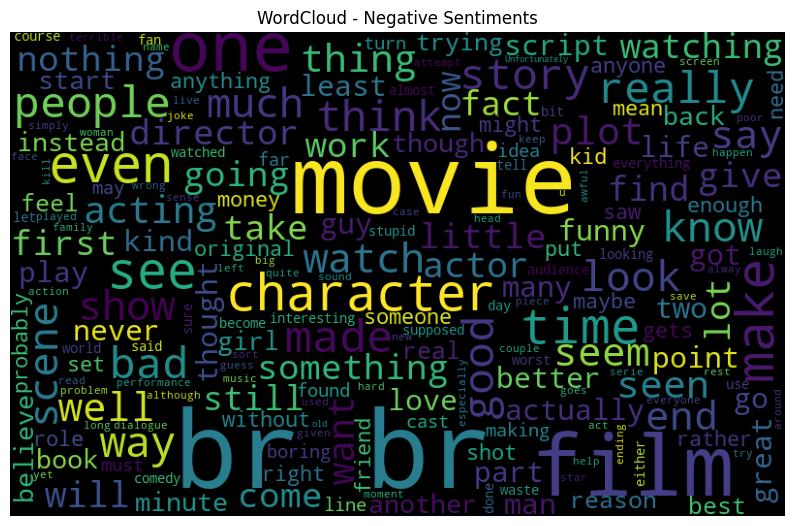

In [7]:
# WordCloud for Negative Sentiments
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_review = imdb_data[imdb_data['sentiment'] == 'negative']

negative_sentences = negative_review["review"]

pos = "".join(map(str, negative_sentences))

pos_wordCloud = WordCloud(width=800, height=500,
                          random_state=21, max_font_size=110).generate(pos)

plt.figure(figsize=(10, 10))
plt.imshow(pos_wordCloud)
plt.title('WordCloud - Negative Sentiments')
plt.axis('off')
plt.show()

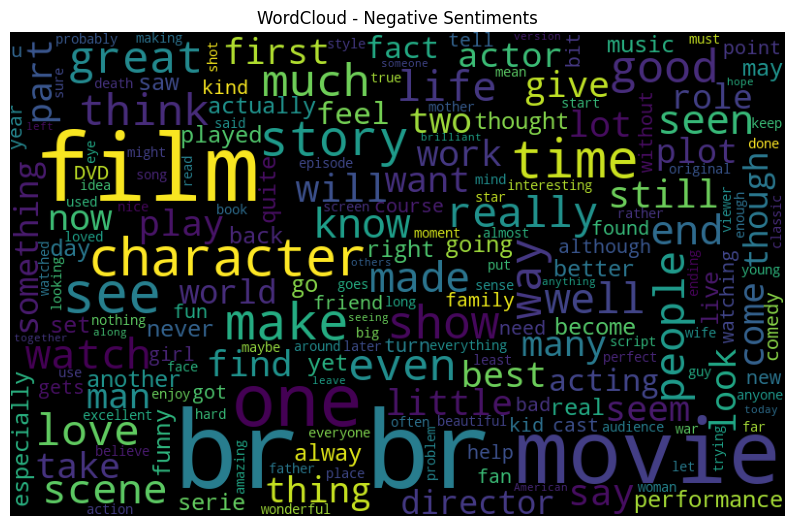

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_review = imdb_data[imdb_data['sentiment'] == 'positive']

negative_sentences = negative_review["review"]

pos = "".join(map(str, negative_sentences))

pos_wordCloud = WordCloud(width=800, height=500,
                          random_state=21, max_font_size=110).generate(pos)

plt.figure(figsize=(10, 10))
plt.imshow(pos_wordCloud)
plt.title('WordCloud - Negative Sentiments')
plt.axis('off')
plt.show()

### TF-IDF Vectorization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',
                        encoding='latin-1', ngram_range=(1, 2), stop_words='english')

text_count_matrix = tfidf.fit_transform(imdb_data.review)

print(text_count_matrix)

  (0, 45034)	0.09253434188248971
  (0, 89673)	0.07213012543191344
  (0, 74594)	0.10663321374373905
  (0, 82151)	0.09838124599333377
  (0, 73619)	0.10978263267498274
  (0, 146964)	0.09372980851154286
  (0, 59831)	0.08494606627675283
  (0, 29242)	0.09555864439379252
  (0, 43201)	0.09904493813800215
  (0, 85350)	0.10534377600048954
  (0, 108244)	0.10534377600048954
  (0, 153932)	0.10663321374373905
  (0, 45829)	0.10978263267498274
  (0, 85237)	0.10978263267498274
  (0, 119088)	0.10534377600048954
  (0, 17165)	0.0625166397533348
  (0, 8722)	0.07128542118281009
  (0, 47061)	0.0702518647813566
  (0, 24820)	0.10978263267498274
  (0, 108543)	0.1080950576892546
  (0, 41333)	0.1080950576892546
  (0, 52986)	0.10314691999952942
  (0, 88064)	0.10050678208351771
  (0, 97296)	0.10978263267498274
  (0, 15519)	0.09460608146350895
  :	:
  (49999, 119102)	0.09191316988418308
  (49999, 141974)	0.057698442418262656
  (49999, 46700)	0.05978602510503019
  (49999, 129677)	0.06087375593538419
  (49999, 153653)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_count_matrix , imdb_data.sentiment, random_state = 2 , test_size=0.30)

In [11]:
y_train = y_train.replace({'positive':1,'negative':0}).values

y_test = y_test.replace({'positive':1,'negative':0}).values

C:\Users\prans\AppData\Local\Temp\ipykernel_10792\548286555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'positive':1,'negative':0}).values
C:\Users\prans\AppData\Local\Temp\ipykernel_10792\548286555.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'positive':1,'negative':0}).values


### Using Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [13]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
accuracy_score = metrics.accuracy_score(y_test, logistic_regression.predict(X_test))
print("Logistic Regression accuracy = " +
      str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(
    y_test, logistic_regression.predict(X_test), target_names=['Negative', 'Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, logistic_regression.predict(X_test)))

Logistic Regression accuracy = 90.05 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      7499
    Positive       0.89      0.92      0.90      7501

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

Confusion Matrix: 
 [[6638  861]
 [ 632 6869]]


### Using Linear-SVC

In [14]:
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
accuracy_score = metrics.accuracy_score(LSVC.predict(X_test), y_test)
print("Linear SVC accuracy = " +
      str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(
    y_test, LSVC.predict(X_test), target_names=['Negative', 'Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, LSVC.predict(X_test)))

Linear SVC accuracy = 90.93 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.92      0.90      0.91      7499
    Positive       0.90      0.92      0.91      7501

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000

Confusion Matrix: 
 [[6752  747]
 [ 614 6887]]


## Using SGDC (Stochastic Gradient Descent)

In [15]:
SGDC = SGDClassifier()
SGDC.fit(X_train, y_train)
predict = SGDC.predict(X_test)
accuracy_score = metrics.accuracy_score(predict, y_test)
print("Stocastic Gradient Classifier accuracy = " +
      str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(
    y_test, predict, target_names=['Negative', 'Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, predict))

Stocastic Gradient Classifier accuracy = 90.32 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.92      0.89      0.90      7499
    Positive       0.89      0.92      0.90      7501

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

Confusion Matrix: 
 [[6642  857]
 [ 595 6906]]


### Comparing Models
When comparing various models with similar accuracies, the decision to choose Logistic Regression hinges on its strengths in **interpretability**, **computational efficiency**, and **handling large datasets**, as well as its robustness against overfitting. While Linear SVC and SGD classifiers may occasionally achieve marginally higher accuracy, Logistic Regression stands out due to its superior interpretability, computational efficiency, scalability with larger datasets, and simpler implementation and tuning process. These factors collectively make Logistic Regression the preferred choice for applications like IMDB movie review sentiment analysis.